In [250]:
import os
import numpy as np 
from PIL import Image, ImageDraw, ImageFile
from random import randint
import random
import math

In [314]:
original_img = Image.open("Mona_Lisa.jpg")
# pixel_value = list(im.getdata())
# print(pixel_value)
smallOriginalSize = int(len(list(original_img.getdata())) )
imageList = list(original_img.getdata())
print(smallOriginalSize)

12159315


# Generate the the triangle off of the original image

In [315]:
#Triangle area using 3 vertices
def triangle_area(x1, y1, x2, y2, x3, y3):
    return abs(1/2 * (x1*y2 + x2*y3 + x3*y1 - x1*y3 - x2*y1 - x3*y2))

def triangle_points():
    return [random.randint(0, original_img.width ),random.randint(0, original_img.height )]

def triangle_points():
    return [random.randint(0, original_img.width ),random.randint(0, original_img.height )]

def make_triangle():
    point1 = triangle_points()
    point2 = triangle_points()
    point3 = triangle_points()
    area = triangle_area(point1[0],point1[1],point2[0],point2[1],point3[0],point3[1])
#     if area / (int(original_img.width * 0.5)*int(original_img.height * 0.5)) * 100 > 3:
    if area / (int(original_img.width)*int(original_img.height)) * 100 > 3:
        return make_triangle()
    return (point1,point2,point3)

def inArea(lis):
    for i in lis:
        try:
            z = original_img[i[0],i[1]]
        except:
            return False
    return True



def colorTriangle(img):
    for i in range(250):
        triangle = make_triangle()
        if triangle is not None:
            p1Color = original_img.getpixel((triangle[0][0], triangle[0][1]))
            p1Color = randomColor(p1Color[0],p1Color[1],p1Color[2])
            p2Color = original_img.getpixel((triangle[1][0], triangle[1][1]))
            p1Color = randomColor(p1Color[0],p1Color[1],p1Color[2])
            p3Color = original_img.getpixel((triangle[2][0], triangle[2][1]))
            color = (p1Color[0] + randint(-100, 100), p2Color[1] + randint(-100, 100), p3Color[2] + randint(-100, 100))
            flat_triangle = [coord for point in triangle for coord in point]  # Convert to flat list
            D = ImageDraw.Draw(img)
            D.polygon(flat_triangle, fill=color)     

def difference(original_img, new_img):
    pic_1 = np.array(original_img, dtype=np.uint64).reshape((original_img.height, original_img.width, 3))
    pic_2 = np.array(new_img, dtype=np.uint64).reshape(original_img.height, original_img.width, 3)
    # sum difference need to be focused on color
    return np.sqrt(np.square(pic_1 - pic_2).sum(axis=-1)).sum()

def randomColor(frist,second,third):
    return (frist + randint(-100,100),second + randint(-100,100),third + randint(-100,100))

In [316]:
blank = Image.new('RGB', (original_img.width, original_img.height), (255, 255, 255))

In [317]:
len(list(blank.getdata()))

12159315

In [318]:
triangle_points()

[1698, 2721]

In [319]:
print(difference(original_img, blank))

4300440523.910603


In [321]:
# newImageArray = []
# for i in range(smallOriginalSize):
#     current = imageList[i]
#     newImageArray.append(randomColor(current[0],current[1],current[2]))
colorTriangle(blank)
blank.save('output.png')
blank.show()

# Genetic Algorithm 

### 1 - generate initial population

In [330]:
population = []

In [331]:
for i in range(4):
    currentImage = Image.new('RGB', (original_img.width, original_img.height), (255, 255, 255))
    colorTriangle(currentImage)
    score = difference(original_img,currentImage)
    population.append({'score':score,'image':currentImage})
# blank.save('output.png')
# blank.show()
currentImage.show()

In [332]:
sorted_data = sorted(population, key=lambda x: x['score'])
sorted_data.reverse()

### 2 - Selection

In [333]:
parent1 = sorted_data[0]
parent2 = sorted_data[1]

### 3 - Crossover && Mutation

In [340]:
parent1Values = parent1['image'].getdata()
parent2Values = parent2['image'].getdata()
rnge = 255

# Crossover
def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, int(len(parent1)))
    p1 = np.array(parent1)
    p2 = np.array(parent2)
    child1 = p1[:int(crossover_point/2)] + p2[int(crossover_point/2):]
    child2 = p2[:int(crossover_point/2)] + p1[int(crossover_point/2):]
    return child1, child2

def uniform_crossover(parent1, parent2):
    max_length = max(len(parent1), len(parent2))
    child1 = []
    child2 = []
    for i in range(max_length):
        if i < len(parent1) and i < len(parent2):
            if random.random() < 0.5:
                child1.append(parent1[i])
                child2.append(parent2[i])
            else:
                child1.append(parent2[i])
                child2.append(parent1[i])
        elif i < len(parent1):
            child1.append(parent1[i])
        else:
            child2.append(parent2[i])
    return child1, child2

# Mutation
def mutate(parent1, parent2, individual, mutation_rate):
    currentIndividual = individual
    for i in range(len(currentIndividual)):
        if random.random() < mutation_rate:
            new_value = (255, 255, 255)
            currentIndividual[i] = new_value
    child_result1 = difference(original_img, currentIndividual)
    child_result2 = difference(original_img, currentIndividual)
    parent_result1 = difference(original_img, parent1)
    parent_result2 = difference(original_img, parent2)
    if child_result1 < 10000 and child_result2 < 10000:
        return {'isValid':True,'newParent':currentIndividual}
    
    return  {'isValid':False,'newParent':individual}



In [341]:
child1,child2 = uniform_crossover(original_img.getdata(),parent1Values)

In [342]:
mutedChild1 = mutate( parent1['image'], parent2['image'],child1,0.01)

In [343]:

# Create a blank image
mutateImg = Image.new('RGB', ( int(parent1['image'].width), int(parent1['image'].height)), (255, 255, 255))

# Create a pixel array

# Add the pixel array to the blank image
mutateImg.putdata(mutedChild1['newParent'])

# Save or display the image
mutateImg.save('mutated1.png')
mutateImg.show()

In [344]:
mutedChild2  = mutate( parent1['image'], parent2['image'],child1,0.04)

In [345]:

# Create a blank image
mutateImg = Image.new('RGB', ( int(parent1['image'].width), int(parent1['image'].height)), (255, 255, 255))

# Create a pixel array

# Add the pixel array to the blank image
mutateImg.putdata(mutedChild2['newParent'])

# Save or display the image
mutateImg.save('mutated2.png')
mutateImg.show()

# Final Result - Abstract Art generation of the original image

In [346]:

# Create a blank image
blankChild = Image.new('RGB', (50, 50), (255, 255, 255))

# Create a pixel array

# Add the pixel array to the blank image
blank.putdata(child1)

# Save or display the image
blank.save('output.png')
blank.show()

# Statistics

In [347]:
import matplotlib.pyplot as plt

In [348]:
# Define the x and y values
x = [0,1,2,3,]
y = [difference(original_img,parent1Values),difference(original_img,parent2Values),difference(original_img,child1),difference(original_img,child2)]

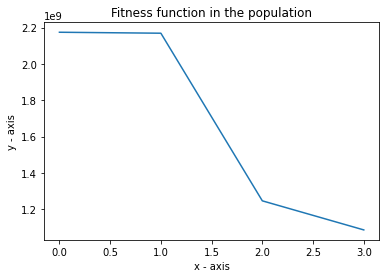

In [349]:
# Plot the points
plt.plot(x, y)

# Label the axes
plt.xlabel('x - axis')
plt.ylabel('y - axis')

# Add a title
plt.title('Fitness function in the population')

# Display the plot
plt.show()

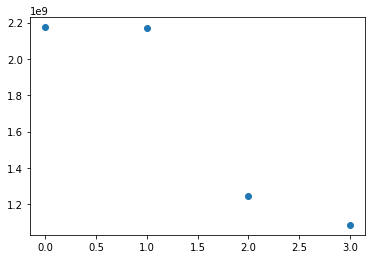

In [350]:
plt.scatter(x, y)
plt.show()

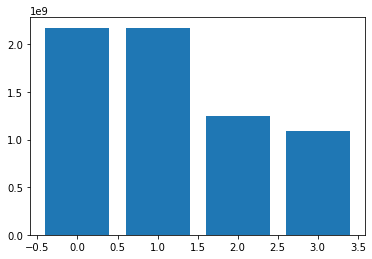

In [351]:
plt.bar(x,y)
plt.show()